In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as mticker
import datetime
import math

In [51]:
Stock = ['IONQ', 'MSFT', "NVDA",]

In [52]:
def computeRSI(data, time_window):
    diff = data.diff(1).dropna()

    up_chg = 0*diff
    down_chg = 0*diff

    up_chg[diff>0] = diff[diff>0]
    down_chg[diff<0] = diff[diff<0]

    up_chg_avg = up_chg.ewm(com=time_window-1, min_periods = time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1, min_periods = time_window).mean()


    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100- 100/(1+rs)
    return rsi

In [53]:
# Building CandleStick chart


def figure_design(ax):
    ax.set_facecolor("#091217")
    ax.tick_params(axis="both", labelsize = 14, colors='white')
    ax.ticklabel_format(useOffset = False)
    ax.spines['bottom'].set_color('#808080')
    ax.spines['top'].set_color('#808080')
    ax.spines['left'].set_color('#808080')
    ax.spines['right'].set_color('#808080')

def string_to_number(df, column):
    if isinstance(df.iloc[0, df.columns.get_loc(column)], str):
        df[column] = df[column].str.replace(',', "")
        df[column] = df[column].astype(float)

    return df

def read_data_ohlc(filename, stock_code, usecols):
    df = pd.read_csv(filename, header=None, usecols=usecols, names = ["time", stock_code, 'change', 'volume', 'target'],
                        index_col='time', parse_dates=['time'])
    index_with_nan = df.index[df.isnull().any(axis=1)]
    df.drop(index_with_nan, inplace=True) # 0 for rows

    df.index = pd.DatetimeIndex(df.index)

    df = string_to_number(df, stock_code)
    df = string_to_number(df,'volume')
    df = string_to_number(df,'target')

    latest_info = df.iloc[-1,:]
    latest_price = str(latest_info.iloc[0])
    latest_change = str(latest_info.iloc[1])

    df_vol = df['volume'].resample('1Min').mean() # store for later showing histogram chart

    data = df[stock_code].resample('1Min').ohlc()

    data['time'] = data.index
    data['time'] = pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')

    data['MA5'] = data['close'].rolling(5).mean()
    data['MA10'] = data['close'].rolling(10).mean()
    data['MA20'] = data['close'].rolling(20).mean()
    data['RSI'] = computeRSI(data['close'], 14)

    """data['MA1'] = data['close'].rolling(1).mean()
    data['MA5'] = data['close'].rolling(5).mean()
    data['MA10'] = data['close'].rolling(10).mean()"""

    data['volume_diff'] = df_vol.diff()
    data[data['volume_diff']<0] = None
    index_with_nan = data.index[data.isnull().any(axis=1)]
    data.drop(index_with_nan,  inplace=True)

    data.reset_index(drop=True, inplace = True)

    return data, latest_price, latest_change, df['target'].iloc[-1], df['volume'].iloc[-1]


In [54]:
# Line Chart design

def subplot_plot(ax, stock_code, data, latest_price, latest_change, target):
    ax.clear()
    ax.plot(list(range(1, len(data['close'])+1)), data['close'], color='white', linewidth=2)

    y_min = data['close'].min()
    y_max = data['close'].max()
    y_std = data['close'].std() #standard deviation

    if not math.isnan(y_min) and y_max !=0:
        ax.set_ylim([y_min-y_std*0.5, y_max+ y_std*0.5])
    ax.text(0.02, 0.95, stock_code, transform=ax.transAxes, color='#FFBF00', fontsize=11,
             fontweight='bold', horizontalalignment='left', verticalalignment='top')   # first and second are x and y coordiate of plot.


    if latest_change[0] == '+':
        colorcode = '#18b800' # for green 
    else:
        colorcode = '#ff3503' # for red
    ax.text(0.2, 0.95, latest_price, transform=ax.transAxes, color=colorcode, fontsize=11,
             fontweight='bold', horizontalalignment='left', verticalalignment='top')   # first and second are x and y coordiate of plot.
    

    
    ax.text(0.98, 0.65, target, transform=ax.transAxes, color='#FFBF00', fontsize=11,
             fontweight='bold', horizontalalignment='right', verticalalignment='top')   # first and second are x and y coordiate of plot.
    
    ax.text(0.0, 0.95, stock_code, transform=ax.transAxes, color='#FFBF00', fontsize=11,
             fontweight='bold', horizontalalignment='left', verticalalignment='top')   # first and second are x and y coordiate of plot.

    figure_design(ax)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)


In [55]:
# Volume Bar Chart Design



[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

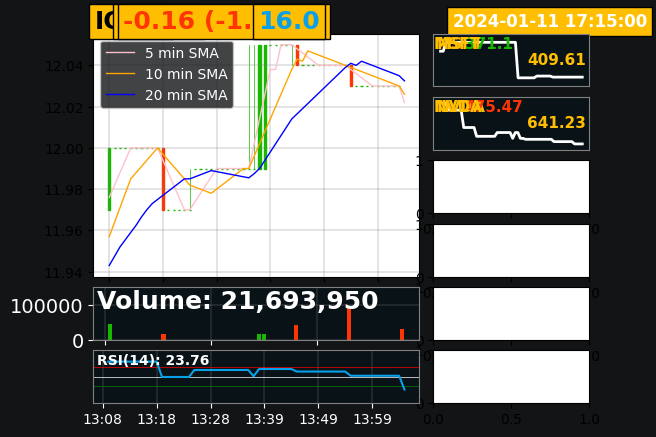

In [56]:
"""time_stamp = datetime.datetime.now() - datetime.timedelta(hours=1) # 1 hour faster than time in Nashville
time_stamp = time_stamp.strftime('%Y-%m-%d')
filename = str(time_stamp)+ ' stock_data.csv'"""


%matplotlib inline
# Plotting:
fig = plt.figure()
fig.patch.set_facecolor("#121416")

gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0, 4:6])
ax3 = fig.add_subplot(gs[1, 4:6])
ax4 = fig.add_subplot(gs[2, 4:6])
ax5 = fig.add_subplot(gs[3, 4:6])
ax6 = fig.add_subplot(gs[4, 4:6])
ax7 = fig.add_subplot(gs[5, 4:6])


ax8 = fig.add_subplot(gs[4, 0:4])
ax9 = fig.add_subplot(gs[5, 0:4])


# Testing
filename = r'C:\Users\User\Desktop\QuantPack\2024-01-03 stock_data.csv'

data, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[0], usecols = [1,3,4,5,6])



candle_counter = range(len(data['open'])-1)
ohlc = []
for candle in candle_counter:
    append_me = candle_counter[candle], data['open'][candle], data['high'][candle], data['low'][candle], data['close'][candle]
    ohlc.append(append_me)

ax1.clear()
candlestick_ohlc(ax1, ohlc, width=0.4, colorup = '#18b800', colordown='#ff3503')
ax1.plot(data['MA5'],color='pink', linestyle='-', linewidth= 1, label='5 min SMA' )
ax1.plot(data['MA10'],color='orange', linestyle='-', linewidth= 1, label='10 min SMA' )
ax1.plot(data['MA20'],color='blue', linestyle='-', linewidth= 1, label='20 min SMA' )

leg = ax1.legend(loc='upper left', facecolor='#121416', fontsize=10)

for text in leg.get_texts():
    plt.setp(text, color='w')


ax1.text(0.005, 1.05, Stock[0], transform=ax1.transAxes, color='black',fontsize=18, fontweight='bold',
            horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


ax1.text(0.2, 1.05, latest_price, transform=ax1.transAxes, color='white',fontsize=18, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


if latest_change[0] == '+':
    colorcode = '#18b800' # for green 
else:
    colorcode = '#ff3503' # for red

ax1.text(0.4, 1.05, latest_change, transform=ax1.transAxes, color=colorcode,fontsize=18, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))

ax1.text(0.6, 1.05, target, transform=ax1.transAxes, color='#08a0e9',fontsize=18, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


time_stamp = datetime.datetime.now()
time_stamp = time_stamp.strftime('%Y-%m-%d %H:%M:%S')

ax1.text(1.4, 1.05, time_stamp, transform=ax1.transAxes, color='white',fontsize=12, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))

ax1.grid(True, color='grey', linestyle='-', which='major',axis='both', linewidth=0.3)

# Running Line chart

data_ax2, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[1], usecols = [1,8,9,10,11])
subplot_plot(ax2, Stock[1], data_ax2, latest_price, latest_change, target )


data_ax3, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[2], usecols = [1,13,14,15,16])
subplot_plot(ax3, Stock[2], data_ax3, latest_price, latest_change, target )


# Running Volume bar chart
figure_design(ax8)
pos = data['open']- data['close'] <0
neg = data['open']- data['close'] >0
data['x_axis'] = list(range(1, len(data['volume_diff'])+1))
ax8.bar(data['x_axis'][pos],data['volume_diff'][pos], color='#18b800', width = 0.8, align='center' )
ax8.bar(data['x_axis'][neg],data['volume_diff'][neg], color='#ff3503', width = 0.8, align='center' )

ymax = data['volume_diff'].max()
ymin = data['volume_diff'].min()
ystd = data['volume_diff'].std()

if not math.isnan(ymax):
    ax8.set_ylim(0, ymax+ystd*3)
ax8.text(0.01, 0.95, 'Volume: '+"{:,}".format(int(volume)), transform=ax8.transAxes, color='white',fontsize=18, fontweight='bold',
            horizontalalignment='left', verticalalignment='top')

ax8.grid(True, color='grey', linestyle='-', which='major', axis='both', linewidth=0.3)
ax8.set_xticklabels([])

ax9.clear()
figure_design(ax9)
ax9.axes.yaxis.set_visible(False)
ax9.set_ylim([-5,105])
ax9.axhline(30,linestyle='-',color='green',linewidth=0.5)
ax9.axhline(50,linestyle='-',color='white',linewidth=0.5)
ax9.axhline(70,linestyle='-',color='red',linewidth=0.5)
ax9.plot(data['x_axis'], data['RSI'], color='#08a0e9', linewidth=1.5)
ax9.text(0.01, 0.95, 'RSI(14): '+str(round(data['RSI'].iloc[-1],2)),  transform=ax9.transAxes, color='white',fontsize=10, fontweight='bold',
            horizontalalignment='left', verticalalignment='top')

xdata=[i for i in data['time']]
def mydate(x, pos=None):
    try:
        t = xdata[int(x)].strftime('%H:%M')
        return t
    except IndexError:
        return ''

ax9.xaxis.set_major_formatter(mticker.FuncFormatter(mydate))
ax9.grid(True,color='grey', linestyle='-', which ='major', axis='both',linewidth=0.3)
ax9.tick_params(axis='x', which='major',labelsize=10)

ax1.set_xticklabels([])